# Regrid testing

Testing and evaluating the efficacy of the regrid process.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.constants as c

In [104]:
df400 = pd.read_csv("./yuxiang1_osm/reformatted_no.400_158.617MHz.osm", delimiter=" ", skiprows=3, index_col=False, names=["RA", "Dec", "Stokes I", "Q", "U", "V", "Freq0"])
df1 = pd.read_csv("./yuxiang1_osm/reformatted_no.1_198.783MHz.osm", delimiter=" ", skiprows=3, index_col=False, names=["RA", "Dec", "Stokes I", "Q", "U", "V", "Freq0"])
df2 = pd.read_csv("./yuxiang1_osm/reformatted_no.2_198.683MHz.osm", delimiter=" ", skiprows=3, index_col=False, names=["RA", "Dec", "Stokes I", "Q", "U", "V", "Freq0"])
df3 = pd.read_csv("./yuxiang1_osm/reformatted_no.3_198.582MHz.osm", delimiter=" ", skiprows=3, index_col=False, names=["RA", "Dec", "Stokes I", "Q", "U", "V", "Freq0"])
df399 = pd.read_csv("./yuxiang1_osm/reformatted_no.399_158.718MHz.osm", delimiter=" ", skiprows=3, index_col=False, names=["RA", "Dec", "Stokes I", "Q", "U", "V", "Freq0"])

In [105]:
print(np.max(df1['Stokes I']), np.mean(df1['Stokes I']), np.median(df1['Stokes I']))
print(np.max(df2['Stokes I']), np.mean(df2['Stokes I']), np.median(df2['Stokes I']))
print(np.max(df3['Stokes I']), np.mean(df3['Stokes I']), np.median(df3['Stokes I']))
print(np.max(df399['Stokes I']), np.mean(df399['Stokes I']), np.median(df399['Stokes I']))
print(np.max(df400['Stokes I']), np.mean(df400['Stokes I']), np.median(df400['Stokes I']))


0.007018 0.0006145631757857113 6.9952e-06
0.00080666 0.00026515547236629776 0.00033061
0.00080559 0.0002649131506209353 0.00033033
0.00081011 0.00026686923077285903 0.00033291500000000003
0.0008094 0.000266208336881575 0.00033143500000000004


## Testing Yuxiang's box

In [20]:
import h5py

f1 = h5py.File('yuxiang1.h5', 'r')
data1 = np.array(f1.get('BrightnessTemp')['brightness_temp'])

In [89]:
T_max = np.max(data1)
print(T_max)

37.33767


In [93]:
print(df1['Freq0'][0])

RAs = np.array(df400['RA'])
print(RAs < 180)

max_RA = np.max(RAs, where=(RAs < 180), initial=0)
min_RA = np.min(RAs, where=(RAs > 180), initial=360) - 360

print(max_RA, min_RA)

square_size = (np.pi/180) * (max_RA - min_RA) / 400

print(square_size)

L_max = 2e26 * c.k_B.value * (df1['Freq0'][0] ** 2) * T_max * (square_size ** 2) / (c.c.value ** 2)
print(L_max * 1e5)

198783000.0
[False False False ...  True  True  True]
0.322649 -0.3194310000000087
2.8016025153013357e-05
3.557874270046575


In [96]:
median_arr = []
mean_arr = []
max_arr = []

for t in range(data1.shape[2]):
    channel = data1[:, :, t]
    median_arr.append(np.median(channel))
    mean_arr.append(np.mean(channel))
    max_arr.append(np.max(channel))

median_arr = np.array(median_arr)
mean_arr = np.array(mean_arr)
max_arr = np.array(max_arr)

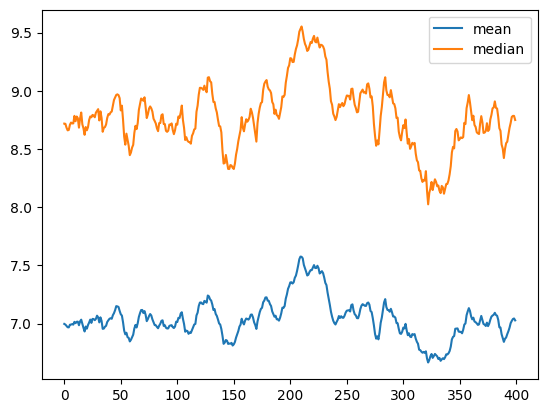

In [ ]:
plt.plot(mean_arr, label="Raw Mean")
plt.plot(median_arr, label="Raw Median")
plt.legend()
plt.show()

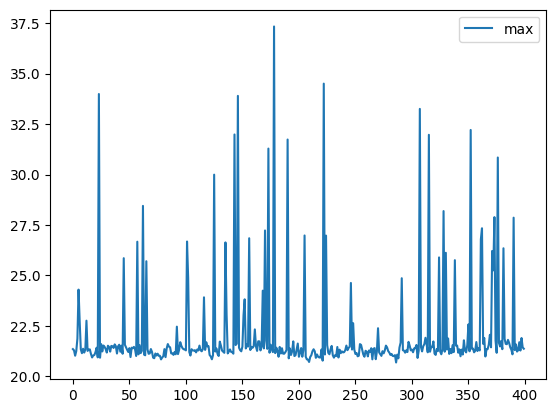

In [100]:
plt.plot(max_arr, label="max")
plt.legend()
plt.show()